In [1]:
import pandas as pd


pair_hints_ua_full_path='{}/{}'.format(base_path,'ignore/pair_hints/part-00000-6faaa18e-01c3-46a7-9126-dc1a649347de-c000.csv')
pair_hints_ap_full_path='{}/{}'.format(base_path,'pos/pair_hints/part-00000-731773b6-dbb0-42ce-aac0-d456c5d508c5-c000.csv')
pair_hints_an_full_path='{}/{}'.format(base_path,'neg/pair_hints/part-00000-941c53f6-b63b-406a-9af3-11da7a7e97ae-c000.csv')


In [2]:
ua_pair_hints_df = pd.read_csv(pair_hints_ua_full_path)
ua_pair_hints_df.head()

,ai_event_result,ua_pairHintCounts
0,[6_7_3],568656
1,[3_6_0],131181
2,[6_7_0],111570
3,[6_3_0],89862
4,[0_3_6],51348


In [3]:
ap_pair_hints_df = pd.read_csv(pair_hints_ap_full_path)
ap_pair_hints_df.head()

,ai_event_result,ap_pairHintCounts
0,[6_7_3],11193
1,[6_7_0],2052
2,[1_0_8],750
3,[6_7_1],555
4,[6_7_4],444


In [4]:
an_pair_hints_df = pd.read_csv(pair_hints_an_full_path)
an_pair_hints_df.head()

,ai_event_result,an_pairHintCounts
0,[6_7_3],6333
1,[6_7_0],981
2,[6_7_4],297
3,[6_7_1],270
4,[1_0_8],246


In [80]:
result_df = pd.merge(ua_pair_hints_df,ap_pair_hints_df, on='ai_event_result', how='inner')
result_df = pd.merge(result_df,an_pair_hints_df, on='ai_event_result', how='inner')
result_df.head()

,ai_event_result,ua_pairHintCounts,ap_pairHintCounts,an_pairHintCounts
0,[6_7_3],568656,11193,6333
1,[3_6_0],131181,120,42
2,[6_7_0],111570,2052,981
3,[6_3_0],89862,144,39
4,[0_3_6],51348,375,234


In [81]:
result_df['sum'] = result_df[['ua_pairHintCounts','ap_pairHintCounts','an_pairHintCounts']].sum(axis=1)
#result_df.head()
result_df = result_df[result_df['sum'] >= 10000]
result_df.sort_values(by='sum').head()

,ai_event_result,ua_pairHintCounts,ap_pairHintCounts,an_pairHintCounts,sum
28,[0_8_6],9942,78,36,10056
29,[7_6_3],9936,138,99,10173
27,[6_2_4],10596,6,3,10605
26,[4_6_0],10962,78,39,11079
25,[1_8_0],11775,123,81,11979


In [82]:
result_df['ua_perc']= round(result_df['ua_pairHintCounts']/result_df['sum'] * 100,4)
result_df['ap_perc']= round(result_df['ap_pairHintCounts']/result_df['sum'] * 100,4)
result_df['an_perc']= round(result_df['an_pairHintCounts']/result_df['sum'] * 100,4)
result_df=result_df.sort_values('ap_perc',ascending=False).reset_index()
result_df= result_df[['ai_event_result','ua_perc','ap_perc','an_perc','sum']]

result_df.head()

,ai_event_result,ua_perc,ap_perc,an_perc,sum
0,[6_7_3],97.0101,1.9095,1.0804,586182
1,[6_7_0],97.3535,1.7905,0.8560,114603
2,[1_0_8],97.6238,1.7893,0.5869,41916
3,[6_7_1],97.4285,1.7299,0.8416,32082
4,[7_6_3],97.6703,1.3565,0.9732,10173


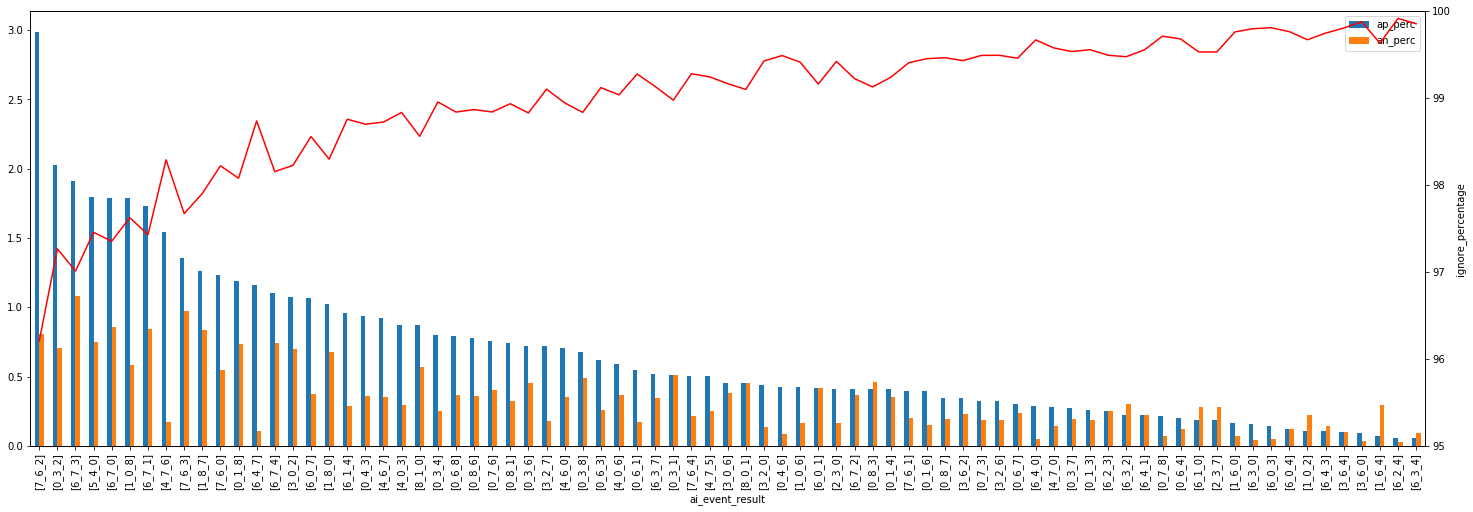

In [76]:
from numpy import array
from matplotlib import pyplot as plt
import numpy as np

ax1 = plt.gca()
ind = result_df['ua_perc']
ind_arr =  array(ind)
ind = np.arange(len(ind)) 
ax1.set_xticks(ind)
result_df.plot(x="ai_event_result", y=['ap_perc','an_perc'], kind="bar",ax=ax1,figsize=(25,8))
ax2 = ax1.twinx()
ax2.plot(ind, ind_arr, 'r-')
ax2.set_ylabel('ignore_percentage')
ax2.set_ylim((95.0,100.0))
plt.show()

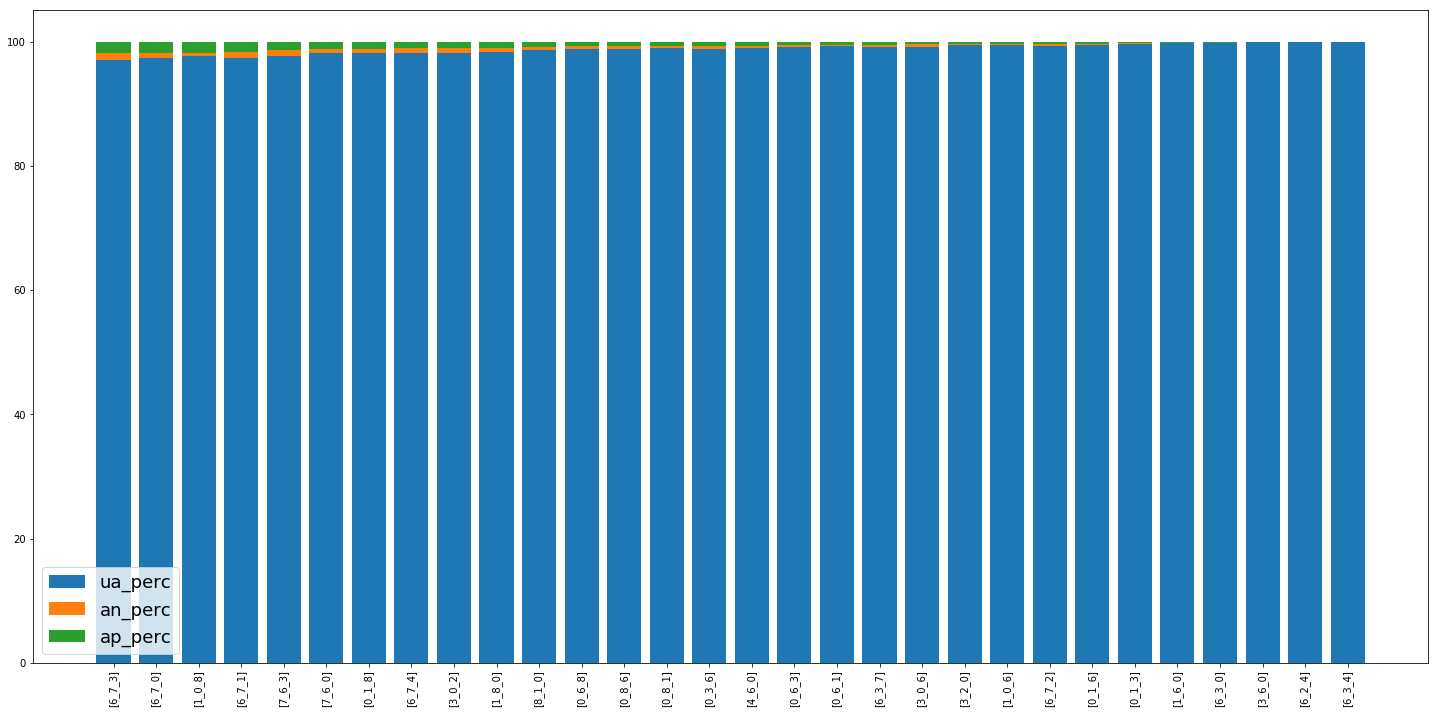

In [83]:
result_df_stack = result_df[['ai_event_result','ua_perc','an_perc','ap_perc']]
cumval=0
fig = plt.figure(figsize=(25,12))
for col in result_df_stack.columns[~result_df_stack.columns.isin(['ai_event_result'])]:
    plt.bar(result_df_stack.ai_event_result, result_df_stack[col], bottom=cumval, label=col)
    cumval = cumval+result_df_stack[col]

_ = plt.xticks(rotation=90)
_ = plt.legend(fontsize=18)

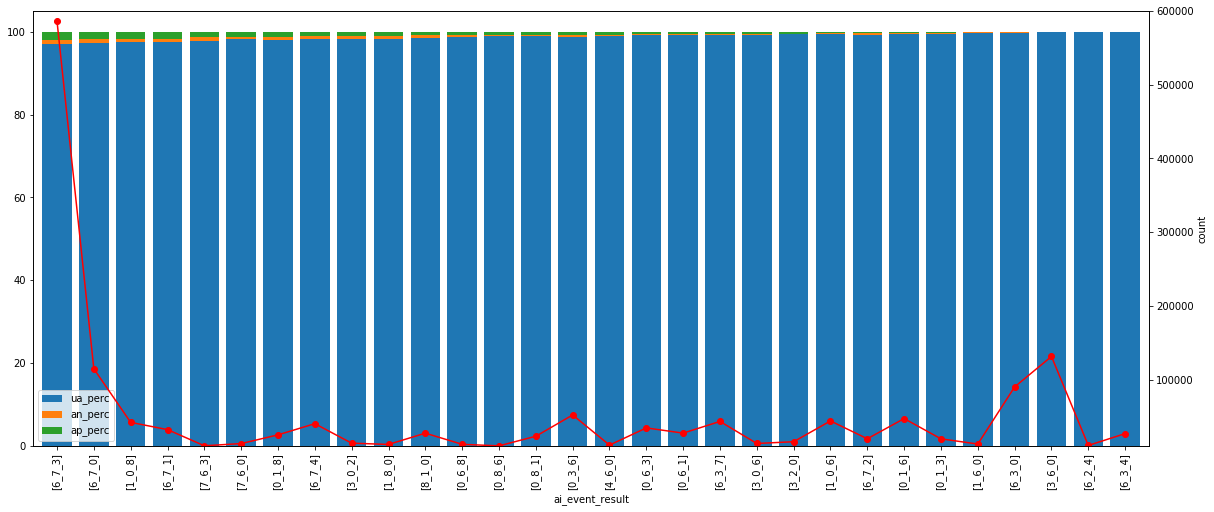

In [85]:
from numpy import array
import numpy as np
ax1 = plt.gca()
ind = result_df['sum']
ind_arr = array(ind)
ind = np.arange(len(ind)) 
ax1.set_xticks(ind)
result_df.plot(x="ai_event_result", y=['ua_perc','an_perc','ap_perc'], kind="bar",stacked=True,ax=ax1,figsize=(20,8),width=0.8)
ax2 = ax1.twinx()
ax2.plot(ind, ind_arr, 'r--', linestyle='-', marker='o', color='red')
ax2.set_ylabel('count')
ax2.set_ylim((10000,600000))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118f23390>]],
      dtype=object)

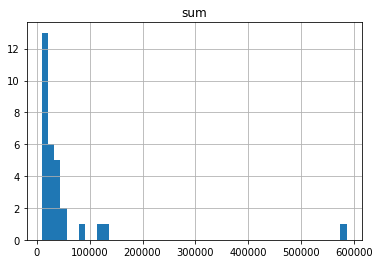

In [86]:
result_df.hist(column='sum', bins=50)